The **Lecture slides** can be found [here](https://github.com/GDSL-UL/wma/raw/main/lectures/w03.html).

## What do APIs actually do?

In this lab, we will unpack how Application Programming Interfaces ("APIs") work and we cover the basics of accessing an API using Python. Instead of downloading a data set, APIs allow programmers, statisticians (or students) to request data directly from a server to a local machine. When you work with web APIs, two different computers --- a client and server --- will interact with each other to request and provide data,
respectively.

### RESTful Web APIs are all around you.

**Web APIs**

-   Allow you query a remote database over the internet
-   Take on a variety of formats
-   Adhere to a particular style known as Representation State Transfer or REST (in most cases)
-   RESTful APIs are convenient because we use them to query database using URLs

**Consider a simple Google search:**

<img src="../labs_img/google.png" width="70%">

Ever wonder what all that extra stuff in the address bar was all about? In this case, the full address is Google's way of sending a query to its
databases requesting information related to the search term *liverpool top attractions*.

<img src="../labs_img/liv_attractions.png" width="70%">

In fact, it looks like Google makes its query by taking the search terms, separating each of them with a **+**, and appending them to the link <https://www.google.com/#q=>. Therefore, we should be able to actually change our Google search by adding some terms to the URL:

<img src="../labs_img/beatles.png" width="70%">

Learning how to use RESTful APIs is all about learning how to format these URLs so that you can get the response you want.

### Group activity

Get into groups of 5 or 6 students. Using your friend the internet, look up answers to the following questions. Each group will be assigned one question and asked to present their findings in 5 min to discuss with the entire class.

1.  What is a `URL` and how can it help us query data? What is a response status and what are the possible categories?
2.  What is a `GET` request? How does a `GET` request work?
3.  What are API keys and how do you obtain them? What kinds of restrictions to they impose on users? Find an example of an API key,  what does it look like?
4.  (For 2 groups) More and more APIs pop up every day. Do a bit of quick research and find 2 different examples of APIs that you would be interested in using. 2 groups, 2 or 3 APIs each.

There are two ways to collect data through APIs in Python:

* **Plug-n-play packages.** Many common APIs are available through user-written Python (or R) Packages. These packages offer functions that conveniently "wrap" API queries and format the response. These packages are usually much more convenient than writing our own query, so it is worth searching for a package that works with the API we need.
* **Writing our own API request.** If no wrapper function is available, web have to write our own API request and format the response ourselves using Python. This is tricky, but definitely doable.

## API Python libraries

<div class="alert alert-success">

**Exercise: `census` pair activity**:

Some Python packages "wrap" API queries and format the response. Lucky us! In pairs, let's have a look at [`census`](https://github.com/datamade/census/tree/master), a wrapper or the United States Census Bureau's API You can also have a look at the different APIs available from the [United States Census Bureau](https://www.census.gov/data/developers.html).

</div>

In [1]:
import pandas as pd
from census import Census

To get started working, set you Census API key. A key can be obtained from http://api.census.gov/data/key_signup.html.

In [2]:
census_api_key = "bedb56996c766753dd72b40615777019dfa9e129" # Replace 'YOUR_CENSUS_API_KEY_HERE' with your actual Census API key.

In [3]:
# Set API key
c = Census(census_api_key)

- Variables in tidycensus are identified by their Census ID, e.g. B19013_001.
- Entire tables of variables can be requested with the table argument, e.g. table = 'B19001'.
- Users can request multiple variables at a time, and set custom names with a named vector.

In Python we can use the library [`census`](https://github.com/datamade/census) to access the American Community Survey (ACS) 5-Year Data (2016-2020)

<div class="alert alert-success">

**Exercise**:

In pairs explore some of the different variables available in the 5-Year ACS (2016-2020). Make a note of 3 variables you would be interested in exploring. The [ACS2 variablespage](https://api.census.gov/data/2020/acs/acs5/variables.html) might help.

</div>

Let's explore income data for example.

In [4]:
# Retrieve income data by state using the ACS table B19001
# Note: The variable 'B19001_001E' represents "Estimate!!Total" in table B19001
income_data = c.acs5.state(('NAME', 'B19001_001E'), Census.ALL, year=2020)
income_data[:10] # just first ten "rows"

[{'NAME': 'Pennsylvania', 'B19001_001E': 5106601.0, 'state': '42'},
 {'NAME': 'California', 'B19001_001E': 13103114.0, 'state': '06'},
 {'NAME': 'West Virginia', 'B19001_001E': 734235.0, 'state': '54'},
 {'NAME': 'Utah', 'B19001_001E': 1003345.0, 'state': '49'},
 {'NAME': 'New York', 'B19001_001E': 7417224.0, 'state': '36'},
 {'NAME': 'District of Columbia', 'B19001_001E': 288307.0, 'state': '11'},
 {'NAME': 'Alaska', 'B19001_001E': 255173.0, 'state': '02'},
 {'NAME': 'Florida', 'B19001_001E': 7931313.0, 'state': '12'},
 {'NAME': 'South Carolina', 'B19001_001E': 1961481.0, 'state': '45'},
 {'NAME': 'North Dakota', 'B19001_001E': 320873.0, 'state': '38'}]

In [5]:
income_df = pd.DataFrame(income_data)
income_df.head()

,NAME,B19001_001E,state
0,Pennsylvania,5106601.0,42
1,California,13103114.0,06
2,West Virginia,734235.0,54
3,Utah,1003345.0,49
4,New York,7417224.0,36


<div class="alert alert-success">

**Exercise**:
    
Discuss the format of the data obtained with your partner and then use the function `acs5.state` to explore the 3 variables you discussed in the previous exercise.

</div>

You can also get more variables by passing the names in a `tuple`. The code below, for example, fetches all the columns from the B19001 table, which include various income brackets. The tuple in the request generates a list of column names (like 'B19001_001E', 'B19001_002E', ..., 'B19001_017E').

In [6]:
variables = tuple(f'B19001_{str(i).zfill(3)}E' for i in range(1, 18))

#### This is what the line above does:

- `range(1, 18)`: This part generates a sequence of numbers from 1 to 17. In Python, range(start, stop) generates numbers from start up to but not including stop. 
- `for i in range(1, 18)`: This is a loop within a comprehension that iterates over each number in the range from 1 to 17.
- `str(i).zfill(3)`: For each number `i`, this converts `i` to a string. Then, `.zfill(3)` pads the string with zeros to make it 3 characters long. For example, if `i` is 2, `str(i).zfill(3)` becomes '002'.
- `f'B19001_{str(i).zfill(3)}E'`: This is an `f-string`, a way to format strings in Python. It inserts the zero-padded string into a larger string. So, for i = 2, you would get 'B19001_002E'.
- Finally, the comprehension is wrapped in `tuple(...)`, which converts the entire series of strings into a tuple.

In [7]:
wide_data = c.acs5.state(('NAME',) + variables, Census.ALL, year=2020)
# Convert to a Pandas DataFrame
wide_df = pd.DataFrame(wide_data)
wide_df.head()

,NAME,B19001_001E,B19001_002E,B19001_003E,B19001_004E,B19001_005E,B19001_006E,B19001_007E,B19001_008E,B19001_009E,B19001_010E,B19001_011E,B19001_012E,B19001_013E,B19001_014E,B19001_015E,B19001_016E,B19001_017E,state
0,Pennsylvania,5106601.0,296733.0,206216.0,223380.0,227639.0,226678.0,231190.0,210468.0,214098.0,193504.0,389971.0,506258.0,674070.0,484045.0,316906.0,341400.0,364045.0,42
1,California,13103114.0,614887.0,507398.0,435382.0,474093.0,454373.0,475343.0,440094.0,461954.0,414016.0,844842.0,1162681.0,1616338.0,1295090.0,940024.0,1227224.0,1739375.0,06
2,West Virginia,734235.0,62341.0,43003.0,45613.0,44635.0,40805.0,38618.0,36587.0,36099.0,31345.0,59462.0,71705.0,84975.0,54432.0,32924.0,28689.0,23002.0,54
3,Utah,1003345.0,36211.0,27395.0,28460.0,32497.0,36116.0,36578.0,36663.0,42449.0,38972.0,77693.0,114434.0,154963.0,115843.0,77194.0,77824.0,70053.0,49
4,New York,7417224.0,471680.0,340614.0,303901.0,298025.0,276764.0,283648.0,257624.0,270607.0,242385.0,480086.0,637950.0,887731.0,690906.0,498076.0,623359.0,853868.0,36


Let’s make our query a bit more precise. We are going to query data on median household income and median age by county in the state of Louisiana from the 2016-2020 ACS. We can use the library `us` to get the code of each of the state by passing their name.

In [8]:
import us
# Get the state object for Louisiana
state_obj = us.states.lookup('Louisiana')
# Get the FIPS code (state code)
code = state_obj.fips

In [9]:
# Retrieve wide format data for median income and median age by county in Louisiana for the year 2020
louisiana_data = c.acs5.state_county(('B19013_001E', 'B01002_001E'), code, Census.ALL, year=2020)
# Convert to a Pandas DataFrame
louisiana_df = pd.DataFrame(louisiana_data)
# Renaming the columns for clarity
louisiana_df.rename(columns={'B19013_001E': 'median_income', 'B01002_001E': 'median_age'}, inplace=True)
louisiana_df.head()  # Display the first few rows

,median_income,median_age,state,county
0,82594.0,36.0,22,005
1,49256.0,37.5,22,011
2,42003.0,37.8,22,017
3,56902.0,44.9,22,023
4,36294.0,37.4,22,029


Let’s plot one of our variables.

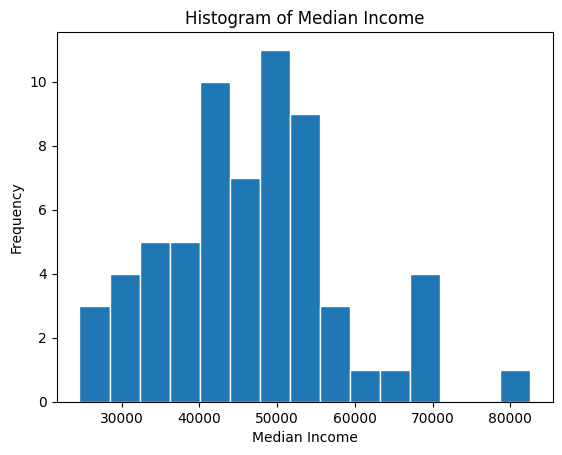

In [10]:
import matplotlib.pyplot as plt

# Plotting histogram for median income with 15 bins
plt.hist(louisiana_df['median_income'], bins=15, edgecolor='white')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.title('Histogram of Median Income')
plt.show()

We can also explore correlations between variables. Let's use `seaborn`.

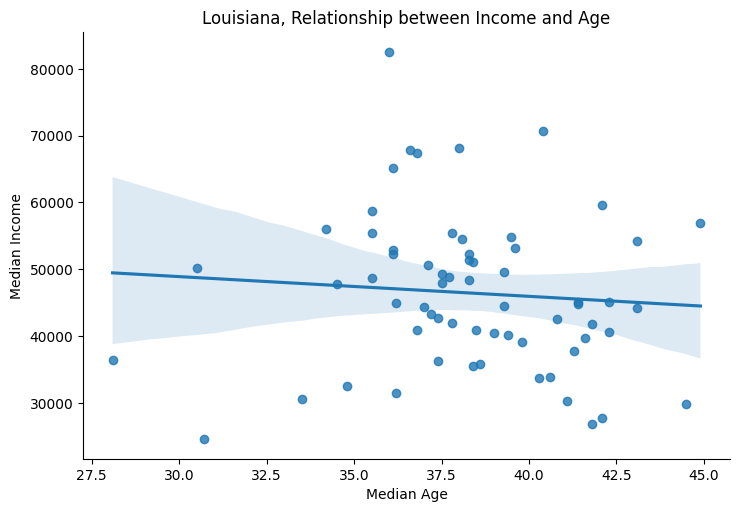

In [11]:
import seaborn as sns

# Creating a scatter plot with a linear regression line
sns.lmplot(x='median_age', y='median_income', data=louisiana_df, aspect=1.5)
plt.xlabel('Median Age')
plt.ylabel('Median Income')
plt.title('Louisiana, Relationship between Income and Age')
plt.show()

<div class="alert alert-success">

**Exercise**:

 In pairs, modify the state, variables and year parameters following the approach adopted above and produce some other simple scatter plots (cloud of points) that suggest correlations between your variables of interest.

</div>

## Your own API request demo

The Python libraries commonly used for API requests are `requests` and `json`.

JSON stands for JavaScript Object Notation. Despite its association with JavaScript, JSON is widely used due to its readability and ease of use by computers, making it the primary format for data transmission through APIs. Most APIs return their responses in JSON format. The `json` library in Python allows you to parse and convert these JSON responses into Python data structures. JSON structures are composed of key-value pairs, similar to Python dictionaries.

In Python, to make an API request and handle the response, you would typically use the `requests` library. A standard API request involves sending a `GET` request to the server's URL, which specifies the data you wish to retrieve. For instance, to request the locations of all the hire bike stations in London from the **Transport for London** [API](https://api.tfl.gov.uk), you would use the `requests.get()` method. This method requires a URL that directs the request to the appropriate server.

In [12]:
import requests
import json

response = requests.get("https://api.tfl.gov.uk/BikePoint/")
response

<Response [200]>

Good! The response code 200 indicates a successful request

Most GET request URLs for API querying have three or four components:

1. Authentication Key/Token: A user-specific character string appended to a base URL telling the server who is making the query; allows servers to efficiently manage database access.
2. Base URL: A link stub that will be at the beginning of all calls to a given API; points the server to the location of an entire database.
3. Search Parameters: A character string appended to a base URL that tells the server what to extract from the database; basically, a series of filters used to point to specific parts of a database.
4. Response Format: A character string indicating how the response should be formatted; usually one of .csv, .json, or .xml.

In [13]:
# Making the API request
response = requests.get("https://api.tfl.gov.uk/BikePoint/")

# Parsing the response content as JSON and converting it to a DataFrame
bike_stations = pd.DataFrame(response.json())

# Printing the column names
print(bike_stations.columns)

Index(['$type', 'id', 'url', 'commonName', 'placeType', 'additionalProperties',
       'children', 'childrenUrls', 'lat', 'lon'],
      dtype='object')


In [14]:
# Creating a new column 'Station ID' by extracting the numeric part from the 'id' column
bike_stations['Station ID'] = bike_stations['id'].str.extract(r'BikePoints_(\d+)', expand=False).astype(float)
bike_stations.head()

,$type,id,url,commonName,placeType,additionalProperties,children,childrenUrls,lat,lon,Station ID
0,"Tfl.Api.Presentation.Entities.Place, Tfl.Api.P...",BikePoints_1,/Place/BikePoints_1,"River Street , Clerkenwell",BikePoint,[{'$type': 'Tfl.Api.Presentation.Entities.Addi...,[],[],51.529163,-0.109970,1.0
1,"Tfl.Api.Presentation.Entities.Place, Tfl.Api.P...",BikePoints_2,/Place/BikePoints_2,"Phillimore Gardens, Kensington",BikePoint,[{'$type': 'Tfl.Api.Presentation.Entities.Addi...,[],[],51.499606,-0.197574,2.0
2,"Tfl.Api.Presentation.Entities.Place, Tfl.Api.P...",BikePoints_3,/Place/BikePoints_3,"Christopher Street, Liverpool Street",BikePoint,[{'$type': 'Tfl.Api.Presentation.Entities.Addi...,[],[],51.521283,-0.084605,3.0
3,"Tfl.Api.Presentation.Entities.Place, Tfl.Api.P...",BikePoints_4,/Place/BikePoints_4,"St. Chad's Street, King's Cross",BikePoint,[{'$type': 'Tfl.Api.Presentation.Entities.Addi...,[],[],51.530059,-0.120973,4.0
4,"Tfl.Api.Presentation.Entities.Place, Tfl.Api.P...",BikePoints_5,/Place/BikePoints_5,"Sedding Street, Sloane Square",BikePoint,[{'$type': 'Tfl.Api.Presentation.Entities.Addi...,[],[],51.493130,-0.156876,5.0


By now you should be able to visualise the data that you have obtained through this API.

Text(0.5, 1.0, 'Bike Points in London')

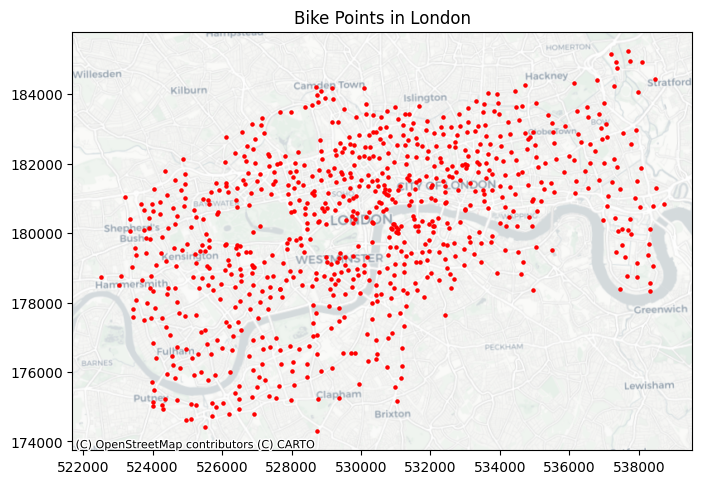

In [15]:
%matplotlib inline
import geopandas as gpd
import contextily as ctx

# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(bike_stations, geometry=gpd.points_from_xy(bike_stations.lon, bike_stations.lat))
# Setting the Coordinate Reference System (CRS) to WGS84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)
# project to British Grid
gdf.to_crs(epsg= 27700, inplace = True)

# Plotting bikepoints on a map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
gdf.plot(ax = ax, color='red', markersize=5)
source = ctx.providers.CartoDB.Positron
ctx.add_basemap(ax, crs= gdf.crs.to_string(), source= source)
ax.set_title('Bike Points in London')

## Geocoding API

Below is a short exploration of a the `geocoder` provided by the library `geopy`. The `geocoder` relies on various external geocoding services. When using `Nominatim`, it accesses data from OpenStreetMap. OpenStreetMap's data includes a vast array of geographical information sourced from contributors globally. This includes street addresses, points of interest, and other location-based data. When you provide an address to the Nominatim geocoder, it queries OpenStreetMap's databases to find the corresponding geographical coordinates.

In your own time, try to use it to automatically embed coordinates between addresses.

In [1]:
from geopy.geocoders import Nominatim

# Create a DataFrame with addresses
some_addresses = pd.DataFrame({
    'name': ["South Campus Teaching Hub", "Sefton Park", "Stanley Street"],
    'addr': ["140 Chatham St, Liverpool L7 7BA", "Sefton Park, Liverpool L17 1AP", "4 Stanley St, Liverpool L1 6AA"]
})

# Initialize geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Function for geocoding
def geocode(address):
    location = geolocator.geocode(address)
    return pd.Series([location.latitude, location.longitude], index=['latitude', 'longitude'])

# Geocode the addresses
lat_longs = some_addresses['addr'].apply(geocode)

# Adding the results back to the DataFrame
some_addresses = some_addresses.join(lat_longs)
some_addresses

,name,addr,latitude,longitude
0,South Campus Teaching Hub,"140 Chatham St, Liverpool L7 7BA",53.400188,-2.964437
1,Sefton Park,"Sefton Park, Liverpool L17 1AP",53.389846,-2.923999
2,Stanley Street,"4 Stanley St, Liverpool L1 6AA",53.407363,-2.987240


#### Reverse Geocoding
You can also reverse geo-code the data, open the output and see what the result is.

In [2]:
# Reverse geocoding (optional)
def reverse_geocode(lat, lon):
    location = geolocator.reverse((lat, lon))
    return location.address

# Apply reverse geocoding
some_addresses[['latitude', 'longitude']].apply(lambda x: reverse_geocode(x['latitude'], x['longitude']), axis=1)

0    148, Chatham Street, Canning / Georgian Quarte...
1    Sefton Park, Smithdown Road, Wavertree, Liverp...
2    Davies Street, Cavern Quarter, Liverpool, Live...
dtype: object

#### Geographic Data through APIs and the web

APIs can help us generate and create spatial data. In this lab, we have both:

-   Written **our own API request.** 
-   Used **Plug-n-play packages.**

There are many APIs where we can get data these days. A few other examples include

-   [The London DataStore API](https://data.london.gov.uk/developers/)
-   [Thames Water API](https://data.thameswater.co.uk/s/)
-   [London Air API](https://www.londonair.org.uk/Londonair/API/)
-   [Crime data](https://data.police.uk/docs/method/crime-street/)

## *Group activity answers*

1.  Uniform Resource Location (`URL`) is a string of characters that, when interpreted via the Hypertext Transfer Protocol (`HTTP`). URLs point to a data resource, notably files written in Hypertext Markup Language (`HTML`) or a subset of a database.

    -   1xx informational response - the request was received, continuing process
    -   2xx successful - the request was successfully received, understood, and accepted
    -   3xx redirection - further action needs to be taken in order to complete the request
    -   4xx client error - the request contains bad syntax or cannot be fulfilled
    -   5xx server error - the server failed to fulfil an apparently valid request

2.  `GET` requests a representation of a data resource corresponding to a particular `URL`. The process of executing the `GET` method is often referred to as a `GET request` and is the main method used for querying RESTful databases. `HEAD`, `POST`, `PUT`, `DELETE`: other common methods, though mostly never used for database querying.

    Surfing the web is basically equivalent to sending a bunch of `GET` requests to different servers and asking for different files written in `HTML`. Suppose, for instance, I wanted to look something up on Wikipedia. Your first step would be to open your web browser and type in http://www.wikipedia.org. Once you hit return, you would see the page below. Several different processes occurred, however, between you hitting "return" and the page finally being rendered:

    1.  The web browser took the entered character string, used the command-line tool "Curl" to write a properly formatted `HTTP GET` request, and submitted it to the server that hosts the Wikipedia homepage.
    2.  After receiving this request, the server sent an `HTTP` response, from which `Curl` extracted the HTML code for the page (partially shown below).
    3.  The raw `HTML` code was parsed and then executed by the web browser, rendering the page as seen in the window.
    4.  Most APIs requires a key or other user credentials before you can query their database. Getting credentials for an API requires that you register with the organization. Once you have successfully registered, you will be assigned one or more keys, tokens, or other credentials that must be supplied to the server as part of any API call you make. To make sure users are not  abusing their data access privileges (e.g., by making many rapid queries), each set of keys will be given rate limits governing the total number of calls that can be made over certain intervals of time.

3.  Most APIs requires a key before you can query their database. This usually requires you to register with the organization. Most APIs are set up for developers, so you will likely be asked to register an "application." All this really entails is coming up with a name for your app/bot/project and providing your real name, organization, and email. Note that some more popular APIs (e.g., Twitter, Facebook) will require additional information, such as a web address or mobile number. Once you have registered, you will be assigned one or more keys, tokens, or other credentials that must be supplied to the server as part of any API call you make. Most API keys limits the total number of calls that can be made over certain intervals of time. This is so users do not busing their data access privileges.

## References

-   [Brief History of the Internet](https://www.internetsociety.org/resources/doc/2017/brief-history-internet/), by the Internet Society, is a handy (and free!) introduction to how it all came to be.
-   Haklay, M., Singleton, A., Parker, C. 2008. ["Web Mapping 2.0: The Neogeography of the GeoWeb"](https://compass.onlinelibrary.wiley.com/doi/abs/10.1111/j.1749-8198.2008.00167.x).
    Geography Compass, 2(6):2011--2039
- [A blog post from JoeMorrison](https://joemorrison.medium.com/death-of-an-open-source-business-model-62bc227a7e9b) commenting on the recent change of licensing for some of the core software from Mapbox
- Terman, R., 2020. [Computational Tools for Social Science](https://plsc-31101.github.io/course/)